In [17]:
x = 2
lua = 4.20
uaki = "pau es muy sexy"
fibonacci = [1,2,3,5,8]
print (fibonacci[3])
print ('Maximo:', max(fibonacci))
print (uaki)
for index, dimension in enumerate (fibonacci): print (index,dimension)

5
Maximo: 8
pau es muy sexy
0 1
1 2
2 3
3 5
4 8


Notas: para el análisis de datos se importa la tabla de datos, es lo primero para hacer. 

Librería para importar datos: pandas 

Lib para graficar datos: matplotlib

Lib para hacer analisis estadísticos: scipy

Lib para hacer machine learning: scikitlearn

Lib para hacer trabajos de vectores y matrices eficientemente: numpy

numpy está en C (lenguaje rápido que actua por debajo)


In [18]:
import pandas as pd
%matplotlib inline 
datos = pd.read_excel('limpiadores_datos.xlsx')
datos ['sp_cliente'].value_counts(normalize=True)
#datos ['tam_cliente'].mean()


Cephalopholis colonus        0.357466
Cromis atrilobata            0.266968
Myripristis berndti          0.099548
Haemulon maculicauda         0.058824
Stegastes acapulcoensis      0.054299
Abudefduf troschelii         0.049774
rojo/negro                   0.027149
Cephalopholis panamensis     0.022624
Chelonia mydas               0.013575
Lutjanus viridis             0.009050
Holocanthus passer           0.009050
Scorpaena mystes             0.009050
Acanthurus nigricans         0.009050
Pseudobalistes naufragium    0.004525
Thalassoma lucasanum         0.004525
Novaculichthys taeniurus     0.004525
Name: sp_cliente, dtype: float64

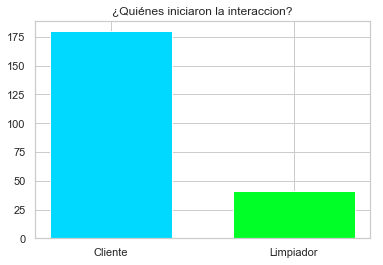

In [19]:
# 08/03/2019
import matplotlib.pyplot as plt

proporc_ini_interac = datos ['i_interaccion'].value_counts()
plt.bar([1, 1.75], proporc_ini_interac, tick_label=proporc_ini_interac.index, color=["#00D9FF", "#00FF26"], width=0.5)
plt.title("¿Quiénes iniciaron la interaccion?")
plt.savefig("G1.png")

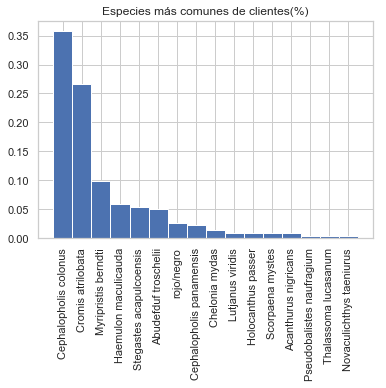

In [20]:
proporc_ini_interac.index
especies = datos ['sp_cliente'].value_counts(normalize=True)
plt.bar([x for x in range(len(especies))], especies.values, tick_label=especies.index, width=1)
plt.title("Especies más comunes de clientes(%)")
plt.xticks(rotation='vertical')
plt.savefig("G2.png")

In [21]:
especies.values

array([0.35746606, 0.26696833, 0.09954751, 0.05882353, 0.05429864,
       0.04977376, 0.02714932, 0.02262443, 0.01357466, 0.00904977,
       0.00904977, 0.00904977, 0.00904977, 0.00452489, 0.00452489,
       0.00452489])

In [22]:
# Filtrar los datos cuando la interaccion es iniciada por un cliente
cliente_inicia = datos[datos["i_interaccion"] == "Cliente"]
# De estos datos, escoger cuando la limpieza no se rechaza
limp_no_rechaza = cliente_inicia[datos["rechaza"] == "No"]
# Calcular porcentajes de los limpiadores que no rechazaron el trabajo, separandolos por especie
porc_sp_limp_no = limp_no_rechaza["sp_limp"].value_counts()
porc_sp_limp_no

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Bodianus diplotaenia          65
Thalassoma lucasanum          41
Johnrandallia nigrirostris    14
Name: sp_limp, dtype: int64

In [23]:
# Filtrar los datos cuando la interaccion es iniciada por un cliente
cliente_inicia = datos[datos["i_interaccion"] == "Cliente"]
# De estos datos, escoger cuando la limpieza no se rechaza
limp_si_rechaza = cliente_inicia[datos["rechaza"] == "Si"]
# Calcular porcentajes de los limpiadores que no rechazaron el trabajo, separandolos por especie
porc_sp_limp_si = limp_si_rechaza["sp_limp"].value_counts()
porc_sp_limp_si

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Bodianus diplotaenia    43
Thalassoma lucasanum    12
Name: sp_limp, dtype: int64

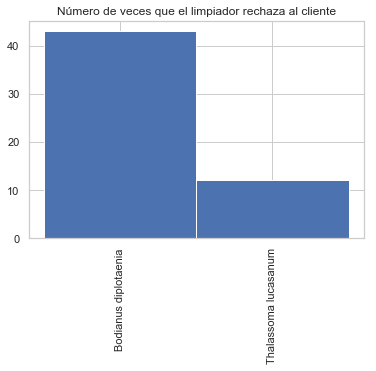

In [24]:
plt.bar([x for x in range(len(porc_sp_limp_si ))], porc_sp_limp_si.values, tick_label=porc_sp_limp_si.index, width=1)
plt.title("Número de veces que el limpiador rechaza al cliente")
plt.xticks(rotation='vertical')
plt.savefig("G3.png")

In [25]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")
titanic [:5]

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


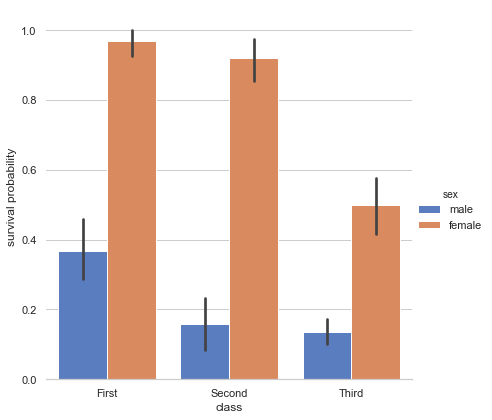

In [26]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

In [27]:
# Filtrar los datos cuando la interaccion es iniciada por un cliente
cliente_inicia = datos[datos["i_interaccion"] == "Cliente"]
# De estos datos, escoger cuando la limpieza no se rechaza
limp_si_rechaza = cliente_inicia[datos["rechaza"] == "Si"]
# Calcular porcentajes de los limpiadores que no rechazaron el trabajo, separandolos por especie
porc_sp_cliente_si = limp_si_rechaza["sp_cliente"].value_counts()
porc_sp_cliente_si

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Cephalopholis colonus       24
Cromis atrilobata            9
Abudefduf troschelii         8
Haemulon maculicauda         6
Stegastes acapulcoensis      4
Cephalopholis panamensis     3
Thalassoma lucasanum         1
Name: sp_cliente, dtype: int64

In [28]:
# Filtrar los datos cuando la interaccion es iniciada por un cliente
cliente_inicia = datos[datos["i_interaccion"] == "Cliente"]
# De estos datos, escoger cuando la limpieza no se rechaza
limp_no_rechaza = cliente_inicia[datos["rechaza"] == "No"]
# Calcular porcentajes de los limpiadores que no rechazaron el trabajo, separandolos por especie
porc_sp_cliente_no = limp_no_rechaza["sp_cliente"].value_counts()
porc_sp_cliente_no

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Cromis atrilobata            41
Cephalopholis colonus        40
Myripristis berndti          16
Stegastes acapulcoensis       7
Haemulon maculicauda          7
rojo/negro                    5
Scorpaena mystes              1
Pseudobalistes naufragium     1
Cephalopholis panamensis      1
Novaculichthys taeniurus      1
Name: sp_cliente, dtype: int64

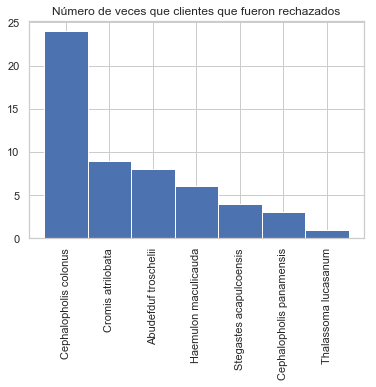

In [29]:
plt.bar([x for x in range(len(porc_sp_cliente_si ))], porc_sp_cliente_si.values, tick_label=porc_sp_cliente_si.index, width=1)
plt.title("Número de veces que clientes que fueron rechazados")
plt.xticks(rotation='vertical')
plt.savefig("G4.png")

In [46]:
# Filtrar los datos cuando cliente se sacude
cliente_si_sacude = datos[datos["sacudida"] == "Si"]
# De estos datos, escoger cuando el cliente persigue
cliente_si_persigue = cliente_si_sacude[datos["persigue"] == "Si"]
# Calcular numero de los clientes que sacudieron y además persiguieron
porc_sp_cliente_si_sacude = cliente_si_persigue["sp_cliente"].value_counts()
porc_sp_cliente_si_sacude

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Cephalopholis colonus    5
Lutjanus viridis         2
rojo/negro               2
Cromis atrilobata        2
Abudefduf troschelii     2
Myripristis berndti      2
Name: sp_cliente, dtype: int64

In [47]:
# Filtrar los datos cuando cliente se sacude
cliente_si_sacude = datos[datos["sacudida"] == "Si"]
# Calcular numero de los clientes que sacudieron 
porc_sp_cliente_si_sacude = cliente_si_sacude["sp_cliente"].value_counts()
porc_sp_cliente_si_sacude

Cephalopholis colonus      14
Cromis atrilobata           8
Abudefduf troschelii        3
Lutjanus viridis            2
Myripristis berndti         2
rojo/negro                  2
Holocanthus passer          1
Scorpaena mystes            1
Stegastes acapulcoensis     1
Chelonia mydas              1
Acanthurus nigricans        1
Name: sp_cliente, dtype: int64

In [35]:
datos[:5]

sp_limp num_limp          sp_cliente  tam_cliente  \
0  Thalassoma lucasanum        1   Cromis atrilobata            4   
1  Thalassoma lucasanum        1   Cromis atrilobata            4   
2  Thalassoma lucasanum        2   Cromis atrilobata            4   
3  Thalassoma lucasanum        1  Holocanthus passer           10   
4  Thalassoma lucasanum        2   Cromis atrilobata            4   

  i_interaccion         pose rechaza sacudida persigue huye  
0       Cliente  hacia abajo      No       No        -    -  
1     Limpiador            -       -        -        -    -  
2       Cliente  hacia abajo      No       No        -    -  
3     Limpiador            -       -       Si       No   No  
4       Cliente  hacia abajo      No       No        -    -

In [43]:
sacudida_no = datos[datos["sacudida"].str.lower() == "no"]
sacudida_no[sacudida_no["huye"].str.lower() == "si"]

Empty DataFrame
Columns: [sp_limp, num_limp, sp_cliente, tam_cliente, i_interaccion, pose, rechaza, sacudida, persigue, huye]
Index: []